In [1]:
import networkx as nx
import json
from operator import itemgetter
%matplotlib inline

# Create DiGraph

In [2]:
d = nx.DiGraph()
dias = [
    '2022-01-31',
    '2022-02-01', 
    '2022-02-02', 
    '2022-02-03', 
    '2022-02-04',
    '2022-02-05',
    '2022-02-06',
]

for dia in dias:
    with open(f'datalake/extract_date={dia}.json') as file:
        search_tweets = json.load(file)
        retweets = []
        for tweet in search_tweets:
            retweets.append(tweet)
        for retweet in retweets:
            retweeted_status = retweet['retweeted_status']
            retweeted_sn = retweeted_status['user']['screen_name']
            retweeter_sn = retweet['user']['screen_name']
            if d.has_edge(retweeted_sn, retweeter_sn):
                d.edges[retweeted_sn, retweeter_sn]['weight'] += 1
            else:
                d.add_edge(retweeted_sn, retweeter_sn, weight = 1)

d.remove_edges_from(list(nx.selfloop_edges(d)))

# Analyze Graph

In [3]:
# Dados mais genéricos
print(f'Quantidade de nós: {d.number_of_nodes()}')
print(f'Quantidade de arestas: {d.number_of_edges()}')
print(f'É fortemente conectada? {nx.is_strongly_connected(d)}')
print(f'Quantidade de redes fortemente conectados: {nx.number_weakly_connected_components(d)}')
print(f'Quantidade de Selfloops: {nx.number_of_selfloops(d)}')

Quantidade de nós: 1035
Quantidade de arestas: 879
É fortemente conectada? False
Quantidade de redes fortemente conectados: 161
Quantidade de Selfloops: 0


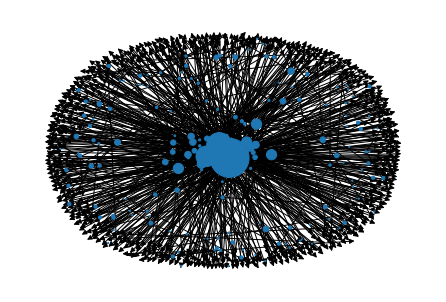

In [5]:
node_sizes = [d.out_degree(n, weight='weight') * 1.5 for n in d.nodes]
nx.draw(d, node_size=node_sizes)
nx.write_graphml(d, 'd.graphml')